**Advanced topics for Jupyter Notebooks and Scientific Python**
2017

Material from: Dr. S Pichardo, Scientist TBRRI  
Adjunct Professor, Electrical Engineering, Lakehead University

# Correct use of Markdown

Markdown is the *other* reason why Notebooks are becoming incredible popular. It is an extremely simple way to document your work and yet it remains visually appealing to read through. Be sure of consulting the [markdown cheat-sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). These are some of the very basic rules to create multi-level heading, lists, enumerates, etc (a "." represents an space):
```
# H1
## H2
### H3
#### H4
##### H5
###### H6
```

```
1. First ordered list item
2. Another item
⋅⋅* Unordered sub-list. 
1. Actual numbers don't matter, just that it's a number
⋅⋅1. Ordered sub-list
4. And another item.


* Unordered list can use asterisks
- Or minuses
+ Or pluses
```

Here we will see how the lists will be rendered:
1. First ordered list item
2. Another item
  * Unordered sub-list. 
1. Actual numbers don't matter, just that it's a number
  1. Ordered sub-list
4. And another item.


* Unordered list can use asterisks
- Or minuses
+ Or pluses

# Use of magic commands

One of the biggest differentiators of IPython over vanilla Python interpreter is the availability of [*magic*](http://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=magic) commands, which add a lot *tricks* to ease your coding. There quite a lot of magic commands but these two of the most useful.

## %pdb on
This command starts the Python debugger ([pdb](https://docs.python.org/2/library/pdb.html)) immediately after an error occurs and shows an ``ipdb`` prompt at the  location where an error occurred. From there you can inspect the variables, list the code around, etc.  
A very simple example is shown below. Even if this example the error message is very clear,  for much more complex functions it is often very hard to figure out. **Very important**, to stop the debugger you have to type "``q +[*enter*]``" in the debugger window. 

In [ ]:
import numpy as np
#we activate the automatic debugger
%pdb on 

def MatSum(a,b):
    return a+b

def Function_WithError():
    a = np.zeros((10,10))
    b= np.ones((11,10)) # Here it is the error, first dimension was supposed to be 10
    # a and b don't have same size so we can't do operations with them
    c=MatSum(a,b) #this will trigger an error
    return c

c=Function_WithError()

Automatic pdb calling has been turned ON


ValueError: operands could not be broadcast together with shapes (10,10) (11,10) 

> <ipython-input-3-f4afe90487be>(6)MatSum()
      4 
      5 def MatSum(a,b):
----> 6     return a+b
      7 
      8 def Function_WithError():



## % prun
This command runs a profiler and prints detailed info of which sections of the code is taking most of the computing time.

In [2]:
import numpy as np
def VeryInefficientAdditionofMatrices(a,b):
    '''
    This will add the values of 2 3D matrices using a dummy loop method, very inefficient
    '''
    c=np.zeros(a.shape)
    for m in xrange(a.shape[0]):
        for n in xrange(a.shape[1]):
            for o in xrange(a.shape[2]):
                c[m,n,o]=a[m,n,o]+b[m,n,o]
                
def TheRightWayToAddMatrices(a,b):
    '''
    Use instead the built-in matrices operations
    '''
    return a+b
# we use two 100x100x100 random matrices
a=np.random.random((100,100,100)) 
b=np.random.random((100,100,100))

#A small note, we use here the "p = %%prun -r" format to get the results in the variable p,
# you can call just with %prun and results will be displayed in a small pop window
# but you can't save the variable for further analysis
p1 =%%prun -r VeryInefficientAdditionofMatrices(a,b);
p1.print_stats();

p2 =%%prun -r TheRightWayToAddMatrices(a,b);
p2.print_stats();


NameError: name 'xrange' is not defined

It can be clearly seen in this simple case that the function using the built-in matrices functions in numpy is at least **150x** faster. `%prun` can help to tune very compute intense code. See in the [*magic*](http://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=magic) documentation for all the possibilities.

# Different back-ends for matplotlib plotting

Historically, Jupyter (and before IPython) have supported several mechanisms for plotting in an IPython session. How exactly initiate the matplotlib library in Notebooks has changed over the years, and may continue to do so.  
In the current version (Ipython 4.x and up), if you plan to show matplotlib plots, you have to initialize the session with the magic command **%matplotlib**. By default, a separate plot window will appear and you have to expressly use the .show() function.

In [ ]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.random.random(100))
plt.show()

This approach is more common  when you are running ipython from a terminal window. It will open windows for every figure you create. For notebooks, this traditional approach is not very appropriate as figures do not even appear often in front of the notebook, so it makes its use very difficult.

## %matplotib inline
For a better workflow with notebooks, **%matplotlib** has multiple "backends" that can be used. The most common is to use **%matplotlib inline**, which will make the plots to appear in the output frame of a cell.

In [ ]:
#WE NEED TO RESTART KERNEL BEFORE CONTINUING
#this is a little trick to restart the kernel from a cell
import os
os._exit(0)

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.size']=14
mpl.rcParams['figure.figsize']=(6,5) 
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.random.random(100))
plt.show()

As the output is rendered directly in the browser window, this helps to plot a lot of graphs without overloading the number of windows. Properly arranged, this method can be a very effective to analyze and present your results. All the functionality of matplotlib is supported, including subfigures and complex arrangements. The following examples are directly from matplotlib [website](http://matplotlib.org/examples/pylab_examples/subplots_demo.html).


In [ ]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot');

In [ ]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y);

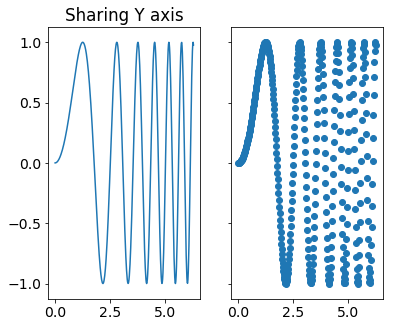

In [4]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y);

In [ ]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
dd=plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

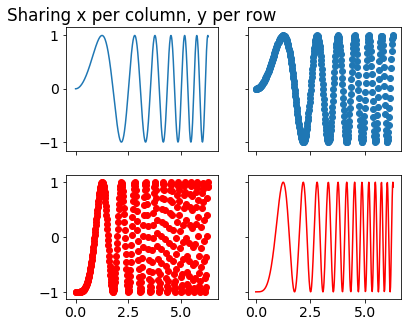

In [6]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
dd=ax4.plot(x, 2 * y ** 2 - 1, color='r')

In [ ]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
dd=plt.subplots(2, 2, subplot_kw=dict(projection='polar'))


## %matplotlib nbagg
**matplotlib inline** is by far more than enough for most applications, however, the inline approach produces a static figure that cannot be easily zoomed or inspected. For this purpose, we can use **%matplotlib nbagg** as backend that uses HTML commands to have some minimal interactions with the plot. 

In [ ]:
#WE NEED TO RESTART KERNEL BEFORE CONTINUING
#this is a little trick to restart the kernel from a cell
import os
os._exit(0)

In [ ]:
#BE SURE OF RESTARTING KERNEL BEFORE CONTINUING
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.random.random(100))
plt.show()

Be sure of switching back to ``inline`` mode if you plan to use the figures to generate paper-ready version files of your plot figures.

## Interactive plotting and function evaluation
Normal plotting with matplotlib is often enough for most of scenarios. However, because Jupyter Notebook uses HTML+JavaScript as low-level engine, there have been multiple initiatives to enhance the experience with notebooks.

For this purpose, the ``ipywidgets`` library was developed to facilitate visualization of results when input parameter are interactively modified, in some sort of minimalistic graphic user interface approach.

This library needs to be installed with ``conda install ipywidgets`` in a terminal window. Below there is a simple example to plot a sine function where several parameters, such as the frequency and temporal step, are interactively set by using simple graphic widgets. 

In [ ]:
#WE NEED TO RESTART KERNEL BEFORE CONTINUING
#this is a little trick to restart the kernel from a cell
import os
os._exit(0)

In [ ]:
#interact only works with inline
%matplotlib inline 
import matplotlib as mpl; mpl.rcParams['font.size']=14; mpl.rcParams['figure.figsize']=(6,5) 
from ipywidgets import interact
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

def GenSinusFunction(freq,tend,lambda_step_log):
    # freq is in MHz, t_end in us, and lambda_step is in log10 so we can visualize effects of high resolution sampling all the way to coarse
    lambda_step=10.0**lambda_step_log
    dt=1./(freq*1e6)*lambda_step
    t=np.arange(0,tend/1e6,dt)
    s=np.sin(np.pi*2*freq*1e6*t)
    plt.figure(figsize=(8,6))
    plt.plot(t*1e6,s)
    plt.xlabel('$\mu$s')
    plt.show()

interact(GenSinusFunction,freq=(0.,2.0),tend=(1.,30.),
           lambda_step_log=(-4,np.log10(0.5),0.01));

This is rendered correctly in a normal notebook, but when using slideshow mode, we can see the slider is too short.
But this is easily fixed by using the low-level class

In [ ]:
from ipywidgets import interact,FloatSlider,IntSlider
interact(GenSinusFunction,freq=FloatSlider(value=1.,min=0.1,max=2.0,step=0.1,width='400px'),
            tend=FloatSlider(value=10.,min=1.,max=30.0,step=1,width='400px'),
            lambda_step_log=FloatSlider(value=-2.,min=-4.,max=np.log10(0.5),step=0.01,width='400px'));

This type of interactive testing is quite useful specially in **signal processing** the effects of multiple filter parameters can be quickly tested.  

In [ ]:
from scipy import signal

def GenSinusFunctionWithNoise(freq,tend,lambda_step_log,noise_level):
    # freq is in MHz, t_end in us, and lambda_step is the sampling rate in log10 so we can visualize effects of high resolution sampling all the way to coarse
    # noise_level is the amplitude between 0 and 1
    lambda_step=10.0**lambda_step_log  # we put the normalize sampling rate in linear
    dt=1./(freq*1e6)*lambda_step # this is the time step
    t=np.arange(0,tend/1e6,dt)   
    s=np.sin(np.pi*2*freq*1e6*t)+(np.random.random(t.shape)-0.5)*noise_level
    return dt,t,s

def TestLPButterworthFilter(order,SignalFreq,CutFrequency,tend,lambda_step_log,noise_level):
    dt,t,s=GenSinusFunctionWithNoise(SignalFreq,tend,lambda_step_log,noise_level)
    NyquistFreq=(1./dt/2.)
    RatioCut=CutFrequency*1e6/NyquistFreq
    b_c, a_c = signal.butter(order, RatioCut) #we design the filter
    s_filtered=signal.lfilter(b_c,a_c,s) #we filter the signal
    w,h=signal.freqz(b_c,a_c,worN=2000) #and we calculate the response function of the filter
    
    plt.figure(figsize=(16,6))
    s1=plt.subplot(1,2,1)
    s1.plot(t*1e6,s,'g:',t*1e6,s_filtered,'b-')
    s1.legend(['noisy image','filtered signal'])
    s1.set_xlabel('$\mu$s')
    plt.show()

    s1=plt.subplot(1,2,2)
    spectrum=(1./dt * 0.5 / np.pi) * w/1e6
    gaindB=20.*np.log10(abs(h))
    s1.plot( spectrum, gaindB, label="order = %d" % order)
    s1.set_xlabel('Frequency (MHz)')
    s1.set_ylabel('Gain (dB)')
    plt.show()
    
v=interact(TestLPButterworthFilter,order=IntSlider(value=6,min=2, max=12, step=1,width='400px'),
           SignalFreq=FloatSlider(value=1.,min=0.1,max=2.0,step=0.1,width='400px'),
           CutFrequency=FloatSlider(value=2.,min=0.,max=4.0,step=0.1,width='400px'),
           tend=FloatSlider(value=10.,min=1.,max=30.,step=1.,width='400px'),
           lambda_step_log=FloatSlider(value=-2.,min=-4.,max=np.log10(0.5),step=0.01,width='400px'),
           noise_level=FloatSlider(value=0.5,min=0.,max=20.,step=0.05,width='400px'));
    

The default operation is that the ``TestButterworthFilter`` function is called as the sliders are being dragged. Sometimes this is not desirable as the functions involved may bee too slow to refresh. In that case it is better to manually specify the widget control for each parameter where the dynamic update only happens when the user release the mouse (``continuous_update=False``). Below there is a variant of previous example where the details for each of the controls are specified.

In [ ]:
from scipy import signal
from ipywidgets import interact,FloatSlider,IntSlider

    
v=interact(TestLPButterworthFilter,order=IntSlider(value=6,min=2, max=12, step=1,width='400px',continuous_update=False),
           SignalFreq=FloatSlider(value=1.,min=0.1,max=2.0,step=0.1,width='400px',continuous_update=False),
           CutFrequency=FloatSlider(value=2.,min=0.,max=4.0,step=0.1,width='400px',continuous_update=False),
           tend=FloatSlider(value=10.,min=1.,max=30.,step=1.,width='400px',continuous_update=False),
           lambda_step_log=FloatSlider(value=-2.,min=-4.,max=np.log10(0.5),step=0.01,width='400px',continuous_update=False),
           noise_level=FloatSlider(value=0.5,min=0.,max=20.,step=0.05,width='400px',continuous_update=False))
    

There are many other possibilities to arrange the widgets or use simpler text boxes instead of slider. You can consult the [ipywdigets documentation](http://ipywidgets.readthedocs.io/en/latest/index.html) for more advanced use.

# Data saving

## Numpy method
Numpy offers a straightforward method to save a group of arrays using the function ``numpy.savez``. Note that you need to give the name of the array that you want saved as or the array will be saved with a default name (ie the a=a, b=b, c=c in the example below)

In [1]:
import numpy as np
from __future__ import print_function
a=np.ones(102)
b=np.zeros((13,45))
c=np.random.random((100,450,60))

np.savez('Data.npz',a=a,b=b,c=c)

DataRead=np.load('Data.npz')
assert(np.all(a==DataRead['a']))
assert(np.all(b==DataRead['b']))
assert(np.all(c==DataRead['c']))
print ('IF WE REACH hERE WE ARE ALL GOOD')
#if there is no error, that means all the matrices are the same in the file

IF WE REACH hERE WE ARE ALL GOOD


## HDF5 files with h5py
Even if ``numpy.savez`` is *ok* for simple saving of data, it has the detrimental feature that files can only be opened in numpy. Using a more open format is always preferred. The [HDF5 library](https://support.hdfgroup.org/HDF5/) is pretty much the defacto library for serious saving of scientific data. Even Matlab is using now HDF5 as backend to create .mat files.  

HDF5 is, unfortunately, a very challenging library to master at its low-level. Fortunately, ``h5py`` is a well matured  Python wrapper for HDF5 libraries and has direct support for numpy arrays, so its use it is very straightforward.

HDF5  has also a very powerful feature to store hierarchical data and uses a "``filesytem``" approach where objects can be accessed by path such as ``/group1/variable1``, ``/group1/anothersubgroup/variable2``, and so on.

In [7]:
import h5py
h5file = h5py.File("test.h5", "w")
#these variables will be created in the root
h5file.create_dataset("a", data=a)
h5file.create_dataset("b", data=b)
h5file.create_dataset("d", data=np.array([]))
h5file.create_dataset("st", data='hola')

#we create a subgroup and we add new variables there
grp=h5file.create_group("sc")
grp.create_dataset('k',data=c)

#Did I mention we can even fine-tune compression per
#object basis? this can activate compression just in the objects that made sense

grp.create_dataset("c", data=c,compression="gzip", compression_opts=9) 
h5file.close()

When we open the file we can access the variable directly by their path.

In [21]:
#we open the file
h5file = h5py.File("test.h5", "r")
assert(np.all(a==h5file['a']))
assert(np.all(b==h5file['b']))
assert(np.all(c==h5file['sc/c'])) 
print (h5file['/sc/c'])
h5file.close()
print ('IF WE REACH hERE WE ARE ALL GOOD')

<HDF5 dataset "c": shape (100, 450, 60), type "<f8">
IF WE REACH hERE WE ARE ALL GOOD


## For more complex data structures
Python's two most basic types, ``dict`` and ``list``, are two the most powerful aspects of the language. However, combining lists and dictionaries with numpy makes difficult to find a simple method to save this type of mixed data structures.

A very straightforward method is to use ``cPickle`` and serialize all the data structure.

In [22]:
import cPickle as pickle 

ToSave={'a':a,
        'b':b,
        'c':c,
        'a_list':[a,b,{'anothera':a,'k':None,'unicode':u'testing'}],
        'a_scalar':45.6,
        'some_text':'b lablablabla'}
 
with file('SavePickle.pickle','wb') as f:
    pickle.dump(ToSave,f,2)  #use protocol 2
    

ModuleNotFoundError: No module named 'cPickle'

In [20]:
 with file('SavePickle.pickle','rb') as f:
    DataLoaded=pickle.load(f )
    
print(DataLoaded['a_list'][2]['unicode'])
print(DataLoaded['a_scalar'])
print(DataLoaded['some_text'])
print(DataLoaded['a_list'][1])

NameError: name 'file' is not defined

Pickle can be quite fast and easy to use, however there are several caveats:

1. Data file is often bloated since it is saving a lot of extra information.
2. It can be only opened in Python, then no capability to interact with other languages and tools.
3. Nothing guarantees that the serialized object will be compatible with newer versions of libraries; this is especially true between objects saved in Python 2.7.X and 3.X.
4. Pickle de-serialization is not secure, so corrupted files (even malicious files) can cause a mayhem.

In general, pickle is more effective for short term storage and inter-processes communication.

## H5PY as a better solution for most common complex data
Coming back to H5Py, it is not hard to create generalized libraries that can save the most common types of data:
* lists
* dictionaries
* strings
* numpy arrays
* scalars

In [4]:
import numpy
import h5py
def ProcType(k,v,f,compatibility,group):
    nametype=type(v).__name__
    if group==None:
        group=f['/']

    if  type(v)== dict:
        newgroup=group.create_group(k)
        newgroup.attrs["type"]="dict"
        SaveToHDF5(v,f,compatibility,newgroup)
    elif type(v) ==list:
        newgroup=group.create_group(k)
        newgroup.attrs["type"]="list";
        for n in xrange(len(v)):
            vlist=v[n]
            itemname = "item_%d"%n
            ProcType(itemname,vlist,f,compatibility,newgroup)
    elif type(v) ==tuple:
        nameList = k
        newgroup=group.create_group(k)
        newgroup.attrs["type"]="tuple"
        for n in xrange(len(v)):
            vlist=v(n)
            itemname = "item_%d"%n
            ProcType(itemname,vlist,f,compatibility,newgroup)
    elif type(v) == numpy.ndarray :
        ##we can apply compression rules for larger arrays
        if v.nbytes >2**10: # if array takes more 1024 bytes
            if compatibility:
                ds=group.create_dataset(k, data=v,compression="lzf") #this is very simple but accessible anywhere compressor, including matlab
            else:
                ds=group.create_dataset(k, data=v,compression="gzip",compression_opts=9) #this gives the best compression
        else:
            ds=group.create_dataset(k, data=v)
        ds.attrs["type"]="ndarray"
    elif  type(v) ==str or  type(v)==unicode or type(v) == numpy.string_ or \
         type(v) ==numpy.unicode_ :
        ##we'll apply compression rules for larger arrays
        ds=group.create_dataset(k, data=v)
        ds.attrs["type"]="string"
    elif numpy.isscalar(v):
        ds=group.create_dataset(k, data=v)
        ds.attrs["type"]="scalar"
    elif v==None:
        ds=group.create_dataset(k, data=0)
        ds.attrs["type"]="None"
    else:
        raise TypeError( "Datatype not handled:" + nametype)


def SaveToHDF5(MyDict,f,compatibility=False,group=None):
    if type(f)==str or type(f)==unicode:
    	fileobj=h5py.File(f, "w")
    elif type(f)==h5py._hl.files.File:
    	fileobj=f
    else:
        raise TypeError( "only string or h5py.file objects are accepted for 'f' object")

    if type(MyDict)!=dict or type(MyDict)==list:
    	raise TypeError("Only dictionaries or lists are supported to be saved")
    for k, v in MyDict.iteritems():
    	ProcType(k,v,fileobj,compatibility,group)
    if type(f)==str or type(f)==unicode:
	fileobj.close() #if we receive a string, that means that we open and close the file

def ReadFromHDF5(f,group=None):
    if type(f)==str or type(f)==unicode:
        fileobj=h5py.File(f, "r")
    elif type(f)==h5py._hl.files.File:
        fileobj=f
    else:
        raise TypeError( "only string or h5py.file objects are accepted for 'f' object")
    if group==None:
        group=fileobj
    MyDict={}
    for namevar,val in group.iteritems():
        
        NameList=None
        typeattr=val.attrs["type"]
        if type(val)==h5py._hl.group.Group:
            ValGroup=ReadFromHDF5(fileobj,val)
            if typeattr=="list" or  typeattr=="tuple" :
                NameList=namevar
            if NameList!=None:
                ListVal=[]
                for n in xrange(len(ValGroup)):
                    itemname = "item_%d"%n
                    ListVal.append(ValGroup[itemname])
                if typeattr=="list":
                    MyDict[NameList] = ListVal
                else:
                    MyDict[NameList] = tuple(ListVal)
            else:
                MyDict[namevar] = ValGroup
        elif typeattr == "None":
             MyDict[namevar]=None
        else:
            MyDict[namevar] = val.value
    if type(f)==str or type(f)==unicode:
        fileobj.close()
    return MyDict

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-4-5d10eef64e74>, line 64)

In [ ]:
ToSave={'a':a,
        'b':b,
        'c':c,
        'a_list':[a,b,{'anothera':a,'k':None,'unicode':u'testing'}],
        'a_scalar':45.6,
        'some_text':'blablablabla'}
SaveToHDF5(ToSave,'test3.h5')

In [ ]:
R=ReadFromHDF5('test3.h5')
print (R['a_list'][2]['unicode'])
print (R['a_scalar'] ) 
print(R['some_text'])
print(R['a_list'][1])


### Lets push a little the test
We have a pickle file that has large amount of data from an MR image. It has the actual pixel value for the image but it also has information about the scanner used, when it was acquired, the time it was acquired, and much more.
The function below will print the elements in the file and handle them differently if they were list, dict or other. 

In [3]:
def PrintElemens(Variable,hmarker=''):
    if type(Variable)==list:
        print(hmarker+'[ list]')
        for entry in Variable:
            PrintElemens(entry,hmarker+'.')
    elif type(Variable)==dict:
        for name,entry in Variable.iteritems():
            #print(hmarker+name+'[dict]:')
            PrintElemens(entry,hmarker+name+'.')
    else:
        print(hmarker+':'+str(type(   Variable)))
            
with file ('RetroControl_Ser33.Pickle' ,'rb') as f:
    LargeMRIData=pickle.load(f)
    
PrintElemens(LargeMRIData)  

NameError: name 'file' is not defined

We will now save it as ah HDF5 file, and then read it from that file. Finally, we will compare the images that come from the data that was in the pickle to the one in the HDF5 and ensuring that they are the same.

In [ ]:
SaveToHDF5(LargeMRIData,'LargeMRIData.hdf5') 

In [ ]:
LargeMRIDataH5=ReadFromHDF5('LargeMRIData.hdf5') 

LargeMRIData (to be copied to Im1) comes from the pickle, LargeMRIDataH5 (to be copied to Im2) comes from the HDF5 read. This data has many images and we will access image number 30

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Im1=LargeMRIData['IMAGES']['Coronal']['Magnitude'][30][0]['data']
Im2=LargeMRIDataH5['IMAGES']['Coronal']['Magnitude'][30][0]['data']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
m=plt.imshow(Im1,cmap=plt.cm.gray)
plt.colorbar(m)
plt.subplot(1,2,2)
mm=plt.imshow(Im2,cmap=plt.cm.gray)
plt.colorbar(m);
assert(np.all(Im1==Im2))
print ('we are good')


Reading from a HDF5 file is a bit slower that pickle. Let's use %prun to quantify.

In [ ]:
%prun LargeMRIDataH5=ReadFromHDF5('LargeMRIData.hdf5')   

In [ ]:
def ReadFromPickle():
    with file ('RetroControl_Ser33.Pickle' ,'rb') as f:
        LargeMRIData=pickle.load(f)
    return LargeMRIData 
%prun LargeMRIData=ReadFromPickle()

**But HDF5/H5PY is designed for random/file-system access!**

In [ ]:
def GetAnImage():
    h5=h5py.File('LargeMRIData.hdf5','r')
    Im=h5['IMAGES']['Coronal']['Magnitude']['item_30']['item_0']['data'].value
    h5.close()
    return Im
%prun Im=GetAnImage()
plt.imshow(Im,cmap=plt.cm.gray);

We can use a file path to access items

In [ ]:
def GetDataPath(path='/IMAGES/Coronal/Magnitude/item_30/item_0/data'):
    h5=h5py.File('LargeMRIData.hdf5','r')
    Im=h5[path].value
    h5.close()
    return Im
%prun Im=GetDataPath()
plt.imshow(Im,cmap=plt.cm.gray);

We can even replace data inside the file (as long as the shape and type of the arrays remain the same)

In [17]:
def ReplaceData(NewData,path='/IMAGES/Coronal/Magnitude/item_30/item_0/data'):
    h5=h5py.File('LargeMRIData.hdf5','r+') #note the difference
    h5[path][...]=NewData #PLEASE NOTE THIS ONLY WORKS IF THE SIZE OF DATA IS THE SAME
    h5.close()

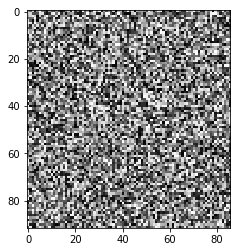

In [21]:
NewData=np.random.random(Im.shape)
ReplaceData(NewData)   
ImNew=GetDataPath()
plt.imshow(ImNew,cmap=plt.cm.gray);  

And of course we can add new data

In [30]:
def AddData(DataName,NewData,fname='LargeMRIData.hdf5',path='/IMAGES/Coronal/Magnitude'):
    h5=h5py.File(fname,'r+') #note the difference
    group=h5[path] 
    group.create_dataset(DataName,data=NewData,compression="gzip",compression_opts=9)
    h5.close()
                         
NewBlob=np.random.random((100,344,34))
AddData('Blob',NewBlob,path='/IMAGES')

ReadNewBlob=GetDataPath(path='/IMAGES/Blob')
print(ReadNewBlob.shape)
                           

(100L, 344L, 34L)


# Final remarks


There is still a ton of resources that can be covered:
* GUIs : PySide, PyQT, Wx

* Getting ready for Python 3 
* **Multi-processing with Jupyter**
* Even more specialized visualization methods: [**Chaco**](http://docs.enthought.com/chaco/), [**Mayavi**](http://docs.enthought.com/mayavi/mayavi/_), [lighting](https://nbviewer.jupyter.org/github/lightning-viz/lightning-example-notebooks/blob/master/index.ipynb), [Bokeh](https://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb), [plotly](https://nbviewer.jupyter.org/github/plotly/python-user-guide/blob/master/Index.ipynb), [PyQtGraph](http://www.pyqtgraph.org/),...
* Integration with GPUs with [PyCUDA](https://mathema.tician.de/software/pycuda/)
* Use of Cython

* Use in clusters with PyMPI
* Device control
* Data analysis with [Pandas](http://pandas.pydata.org/)
* Interface with [R](https://www.r-project.org/) for serious stats
* Genetic optimization with [Pygmo](http://esa.github.io/pygmo/)
* 89683 extra software libraries currently available with ``pip`` (as for Sep 29, 2016)

Python has probably the most comprehensive set of libraries *freely* available for numerical work available in any language.

From the small scale numerical work all the way to large scale simulation, there are a lot of available tools ready to be used.

Slides presentation of this notebook was possible by using the [``nbextension RISE``](https://github.com/damianavila/RISE)

Test your knowledge:

In the code above:
1. In the **Data Saving** section, debug or print both variables a, or b, or c to visually assert the read and saved data are the same
2. In the cell where the image is replaced within a file, do your own replacement to have a completely black image
3. In any other section of **Data Saving** with the pickle file, display other fields that those shown (for instance, a different image from that file)

# In the **Data Saving** section, debug or print both variables a, or b, or c to visually assert the read and saved data are the same

In [2]:
import numpy as np
from __future__ import print_function
a=np.ones(102)
b=np.zeros((13,45))
c=np.random.random((100,450,60))

np.savez('Data.npz',a=a,b=b,c=c)

DataRead=np.load('Data.npz')
assert(np.all(a==DataRead['a']))
assert(np.all(b==DataRead['b']))
assert(np.all(c==DataRead['c']))
print ('IF WE REACH hERE WE ARE ALL GOOD')
#if there is no error, that means all the matrices are the same in the file
print(a)
print(DataRead['a'])

IF WE REACH hERE WE ARE ALL GOOD
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


# In the cell where the image is replaced within a file, do your own replacement to have a completely black image. In any other section of **Data Saving** with the pickle file, display other fields that those shown (for instance, a different image from that file)

Apologies, as I am still unable to run most of the code without getting an error. But as you mentioned, for obtaining a black image, the file could be written with 0's RGB(0,0,0). 